/tmp/ipykernel_31281/1503654963.py:62: UserWarning: You passed a edgecolor/edgecolors ([0.21568627450980393, 0.6078431372549019, 1.0]) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[ndx, 0], X[ndx, 1], marker=symbols[c], s=30, facecolor="none", edgecolor=colors[c])
/tmp/ipykernel_31281/1503654963.py:62: UserWarning: You passed a edgecolor/edgecolors ([0.5019607843137255, 0.5019607843137255, 0.5019607843137255]) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[ndx, 0], X[ndx, 1], marker=symbols[c], s=30, facecolor="none", edgecolor=colors[c])
/home/patel_zeel/miniconda3/lib/python3.9/site-packages/probml_utils/plotting.py:79: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


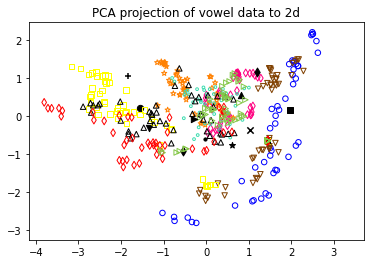

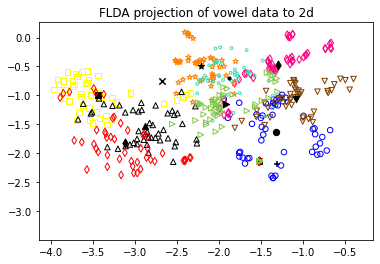

In [1]:
# This code is referenced from
# https://github.com/probml/pmtk3/blob/master/demos/fisherDiscrimVowelDemo.m
# Author:Srikar-Reddy-Jilugu(@always-newbie161)


import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

try:
    from sklearn.decomposition import PCA
except ModuleNotFoundError:
    %pip install -qq scikit-learn
    from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

try:
    from probml_utils.fisher_lda_fit import fisher_lda_fit
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils.fisher_lda_fit import fisher_lda_fit
import probml_utils as pml
import requests
from io import BytesIO

url = "https://github.com/probml/probml-data/blob/main/data/vowelTrain.mat?raw=true"
r = requests.get(url, allow_redirects=True)
rawdata = BytesIO(r.content)

data = loadmat(rawdata)
X = data["Xtrain"]
y = data["ytrain"]
nsamples, ndims = X.shape
nclasses = np.max(y)


def plot_projection_data(X, y, mu, nclasses, figure_num):
    """
    2d data is visualized with their respective symbol and color
    and the centroids of the data are plotted with black filled-in color.
    """

    # To match the Hastie color scheme
    lightblue = [55, 155, 255]
    orange = [255, 128, 0]
    magenta = [255, 0, 128]
    green2 = [132, 199, 71]
    cyan = [61, 220, 176]
    yellow = [255, 255, 0]
    brown = [128, 64, 0]
    blue = [0, 0, 255]
    red = [255, 0, 0]
    black = [0, 0, 0]
    gray = [128, 128, 128]

    colors = [lightblue, blue, brown, magenta, orange, cyan, gray, yellow, black, red, green2]

    plt.figure(figure_num)
    for c in range(0, nclasses):
        colors[c] = [col / 255 for col in colors[c]]
        ndx = np.where(y == (c + 1))
        plt.scatter(X[ndx, 0], X[ndx, 1], marker=symbols[c], s=30, facecolor="none", edgecolor=colors[c])
        plt.scatter(mu[c, 0], mu[c, 1], marker=symbols[c], s=40, facecolor="black")


# ------------------------

K = 2

# PCA projection

pca = PCA(K)
X_pca = pca.fit_transform(X)
X_pca = -X_pca  # make it look like the Hastie figure
muC = np.zeros((nclasses, ndims))
for c in range(0, nclasses):
    muC[c, :] = np.mean((X[np.where(y == (c + 1))[0], :]), axis=0)

muC2d_pca = pca.fit_transform(muC)

symbols = "+ovd*.xs^d><ph"
plot_projection_data(X_pca, y, muC2d_pca, nclasses, figure_num=0)
plt.title("PCA projection of vowel data to 2d")
pml.savefig("fisherDiscrimVowelPCA.pdf")

# ------------------------
# FLDA projection

W = fisher_lda_fit(X, y, K)
W[:, 0] = -W[:, 0]  # make it look like the Hastie figure
X_lda = X @ W
muC2d_lda = muC @ W
plot_projection_data(X_lda, y, muC2d_lda, nclasses, figure_num=1)
plt.title("FLDA projection of vowel data to 2d")
pml.savefig("fisherDiscrimVowelLDA.pdf")

plt.show()